# **IMPORT LIBRARY**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [2]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler 

# **IMPORT DATA**

In [3]:
# Import data from github
url = 'https://raw.githubusercontent.com/BrianNguyen2001/Predict-Etherium-price-by-Machine-Learning/main/pred_eth_data.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True)
data.index = data.index.astype('datetime64[ns]')
data

,polarity,subjectivity,Negative,Positive,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
Time,,,,,,,,,,,,,
2017-11-10,0.000000,0.000000,0.0,0.0,-0.067411,-0.073554,-0.077946,1.430000e+15,233966.0,0.191088,457427.0,6300.0,84500680.0
2017-11-11,0.050000,0.272917,0.0,1.0,0.051555,-0.039368,0.051353,1.440000e+15,194696.0,0.186744,394378.0,6267.0,79370301.0
2017-11-12,0.000000,0.000000,0.0,0.0,-0.021523,-0.064101,-0.052933,1.490000e+15,213315.0,0.210592,434380.0,6245.0,82639583.0
2017-11-13,0.116667,0.308333,0.0,1.0,0.028606,0.102422,0.040523,1.460000e+15,214384.0,0.220279,443176.0,6225.0,89907928.0
2017-11-14,0.000000,0.000000,0.0,0.0,0.066037,0.011626,0.020899,1.450000e+15,226170.0,0.235910,475984.0,6122.0,99374433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,0.200000,0.162500,0.0,1.0,-0.017259,-0.003144,-0.028561,1.440000e+16,508395.0,6.325360,1094639.0,6165.0,633978416.0
2022-05-26,0.163997,0.277742,0.0,1.0,-0.072456,-0.009984,-0.065653,1.420000e+16,474790.0,8.062978,1071180.0,6092.0,687245210.0
2022-05-27,-0.051562,0.317188,1.0,0.0,-0.043788,-0.021856,-0.035474,1.460000e+16,494940.0,6.816255,1093469.0,6218.0,618243706.0


In [4]:
# Check NaN values ​​in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1654 entries, 2017-11-10 to 2022-05-29
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   polarity         1654 non-null   float64
 1   subjectivity     1654 non-null   float64
 2   Negative         1654 non-null   float64
 3   Positive         1654 non-null   float64
 4   return_etherium  1654 non-null   float64
 5   return_bitcoin   1654 non-null   float64
 6   return_litecoin  1654 non-null   float64
 7   avg_diff         1654 non-null   float64
 8   act_address      1654 non-null   float64
 9   avg_gas          1654 non-null   float64
 10  trans_count      1654 non-null   float64
 11  block_count      1654 non-null   float64
 12  block_size       1654 non-null   float64
dtypes: float64(13)
memory usage: 180.9 KB


In [5]:
data.Negative, data.Positive = data.Negative.astype('object'), data.Positive.astype('object')
discrete_data = data[['Negative','Positive']]
discrete_data.describe()


,Negative,Positive
count,1654.0,1654.0
unique,2.0,2.0
top,0.0,1.0
freq,1335.0,1180.0


# **DESCRIPTIVE STATISTICS**  

In [6]:
data.describe()

,polarity,subjectivity,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1.654000e+03,1654.000000,1654.000000,1.654000e+03,1654.000000,1.654000e+03
mean,0.060225,0.229316,0.002254,0.001534,0.001490,4.660133e+15,435454.021161,6.952772,9.070663e+05,6224.828900,2.431480e+08
std,0.099130,0.143044,0.051057,0.040767,0.057099,3.551804e+15,147010.239064,12.890340,2.865304e+05,399.193601,1.535289e+08
min,-0.600000,0.000000,-0.423472,-0.371695,-0.361773,1.390000e+15,171484.000000,0.050078,3.811510e+05,4139.000000,7.937030e+07
25%,0.000000,0.125000,-0.021807,-0.016276,-0.026834,2.300000e+15,305877.250000,0.145192,6.460402e+05,6038.250000,1.309455e+08
50%,0.053002,0.216667,0.001399,0.001477,-0.000090,3.130000e+15,404810.500000,0.586776,8.551020e+05,6404.000000,1.648381e+08
75%,0.101667,0.314559,0.027832,0.018983,0.027714,6.200000e+15,562800.500000,8.263823,1.173746e+06,6475.000000,3.037059e+08
max,0.750000,1.000000,0.264581,0.252472,0.475978,1.470000e+16,905234.000000,200.271677,1.716600e+06,6637.000000,7.664025e+08


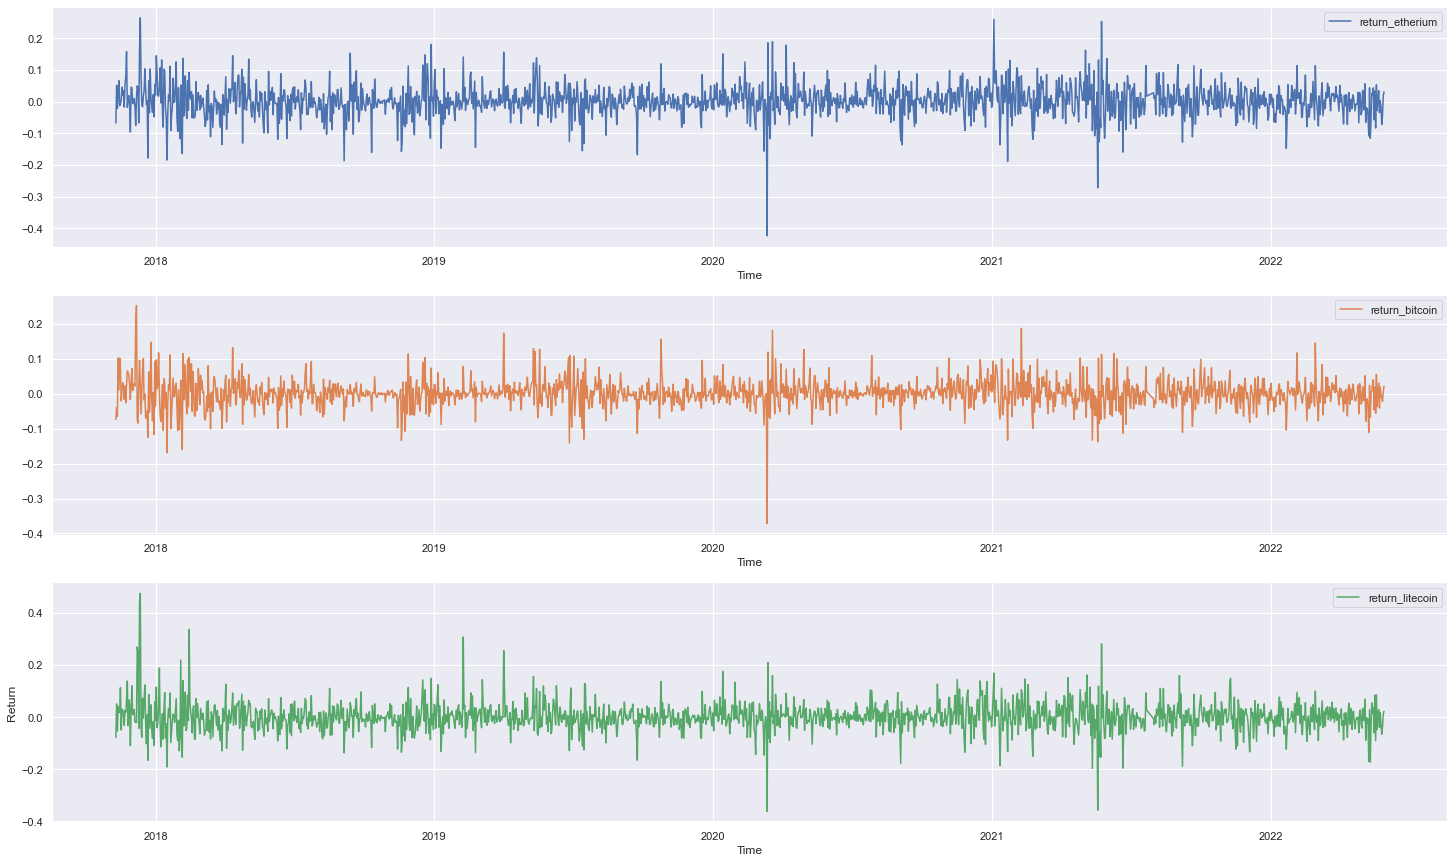

In [7]:
data[['return_etherium','return_bitcoin','return_litecoin']].plot(subplots=True,
                                                                    layout = (3,1),
                                                                    figsize=(25,15),
                                                                    sharex=False,sharey=False)

plt.ylabel('Return')
plt.show()

# **BUILDING MODEL**

In [8]:
df = data.loc['2017-11-10':'2021-11-10']
df.index.set_names('Train sheet',inplace=True)
df

,polarity,subjectivity,Negative,Positive,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
Train sheet,,,,,,,,,,,,,
2017-11-10,0.000000,0.000000,0.0,0.0,-0.067411,-0.073554,-0.077946,1.430000e+15,233966.0,0.191088,457427.0,6300.0,84500680.0
2017-11-11,0.050000,0.272917,0.0,1.0,0.051555,-0.039368,0.051353,1.440000e+15,194696.0,0.186744,394378.0,6267.0,79370301.0
2017-11-12,0.000000,0.000000,0.0,0.0,-0.021523,-0.064101,-0.052933,1.490000e+15,213315.0,0.210592,434380.0,6245.0,82639583.0
2017-11-13,0.116667,0.308333,0.0,1.0,0.028606,0.102422,0.040523,1.460000e+15,214384.0,0.220279,443176.0,6225.0,89907928.0
2017-11-14,0.000000,0.000000,0.0,0.0,0.066037,0.011626,0.020899,1.450000e+15,226170.0,0.235910,475984.0,6122.0,99374433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-06,0.000000,0.000000,0.0,0.0,0.007877,0.006573,-0.008377,1.040000e+16,626350.0,42.057302,1255921.0,6339.0,399182136.0
2021-11-07,0.125000,0.150000,0.0,1.0,0.021889,0.029247,0.021150,1.050000e+16,635935.0,36.519339,1276998.0,6452.0,409029787.0
2021-11-08,0.088674,0.321553,0.0,1.0,0.041452,0.066952,0.131872,1.070000e+16,652986.0,46.677593,1329018.0,6346.0,403306377.0


In [9]:
# Set the independent variable property
feature = df.columns[df.columns!='return_etherium'].to_list()
target=  [df.columns[4]]

In [10]:
y = df[target]
X = df[feature]

# Split the train and test
n_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state=n_state)

**Randome Forest**

In [11]:
# Build Random forest model
random_forest = RandomForestRegressor(random_state = n_state, n_estimators=500, max_features="auto")
random_forest.fit(X_train, y_train)

# Predict
y_pred_RF = random_forest.predict(X_test)

In [12]:
# Create dataframe contain real and forecast value
y_pred_RF = pd.DataFrame(y_pred_RF,index=y_test.index,columns=['random_forest_predict'])
result_RF = pd.concat([y_test,y_pred_RF],axis=1)
result_RF.sort_index(inplace=True)

**Support Vector Regression**

In [13]:
# Call scale function
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale train set
X_sc_train = sc_X.fit_transform(X_train)
y_sc_train = sc_y.fit_transform(y_train)

# Scale test set
X_sc_test = sc_X.fit_transform(X_test)

In [14]:
# Buil SVR model with rbf kernel 
regressor_rbf = SVR(kernel = 'rbf')
regressor_rbf.fit(X_sc_train, y_sc_train)

# Predict
y_rbf_pred = regressor_rbf.predict(X_sc_test)

# Inverse data
y_rbf_pred = y_rbf_pred.reshape(-1,1)
y_pred_rbf = sc_y.inverse_transform(y_rbf_pred)
y_pred_rbf = pd.DataFrame(y_pred_rbf,columns=['svr_rbf_predict'],index=y_test.index)

In [15]:
# Buil SVR model with linear kernel 
regressor_linear = SVR(kernel = 'linear')
regressor_linear.fit(X_sc_train, y_sc_train)

# Predict
y_linear_pred = regressor_linear.predict(X_sc_test)

# Inverse data
y_linear_pred = y_linear_pred.reshape(-1,1)
y_pred_linear = sc_y.inverse_transform(y_linear_pred)
y_pred_linear = pd.DataFrame(y_pred_linear,columns=['svr_linear_predict'],index=y_test.index)

In [16]:
# Create dataframe contain real and forecast value
result_svr = pd.concat([y_test,y_pred_rbf,y_pred_linear],axis=1)
result_svr.sort_index(inplace=True)

# **EVALUATE THE PREDICTIVE PERFORMANCE OF THE MODEL**

In [17]:
# Concate the results of three model
model_results = pd.concat([result_svr,result_RF.random_forest_predict],axis=1)
model_results

,return_etherium,svr_rbf_predict,svr_linear_predict,random_forest_predict
Train sheet,,,,
2017-11-25,-0.018182,0.083135,0.092092,0.063448
2017-12-03,0.005187,0.022770,0.016137,0.022007
2017-12-09,0.038311,0.026011,0.059562,0.049476
2017-12-10,-0.067119,0.001100,-0.005749,0.002124
2017-12-12,0.264581,0.029160,0.225548,0.079664
...,...,...,...,...
2021-10-31,-0.008687,0.007373,0.007058,0.016637
2021-11-01,0.008524,0.007652,0.015332,0.026935
2021-11-02,0.060161,0.015684,0.030722,0.018795


**Visualization Random Forest & Support vector regression prediction**

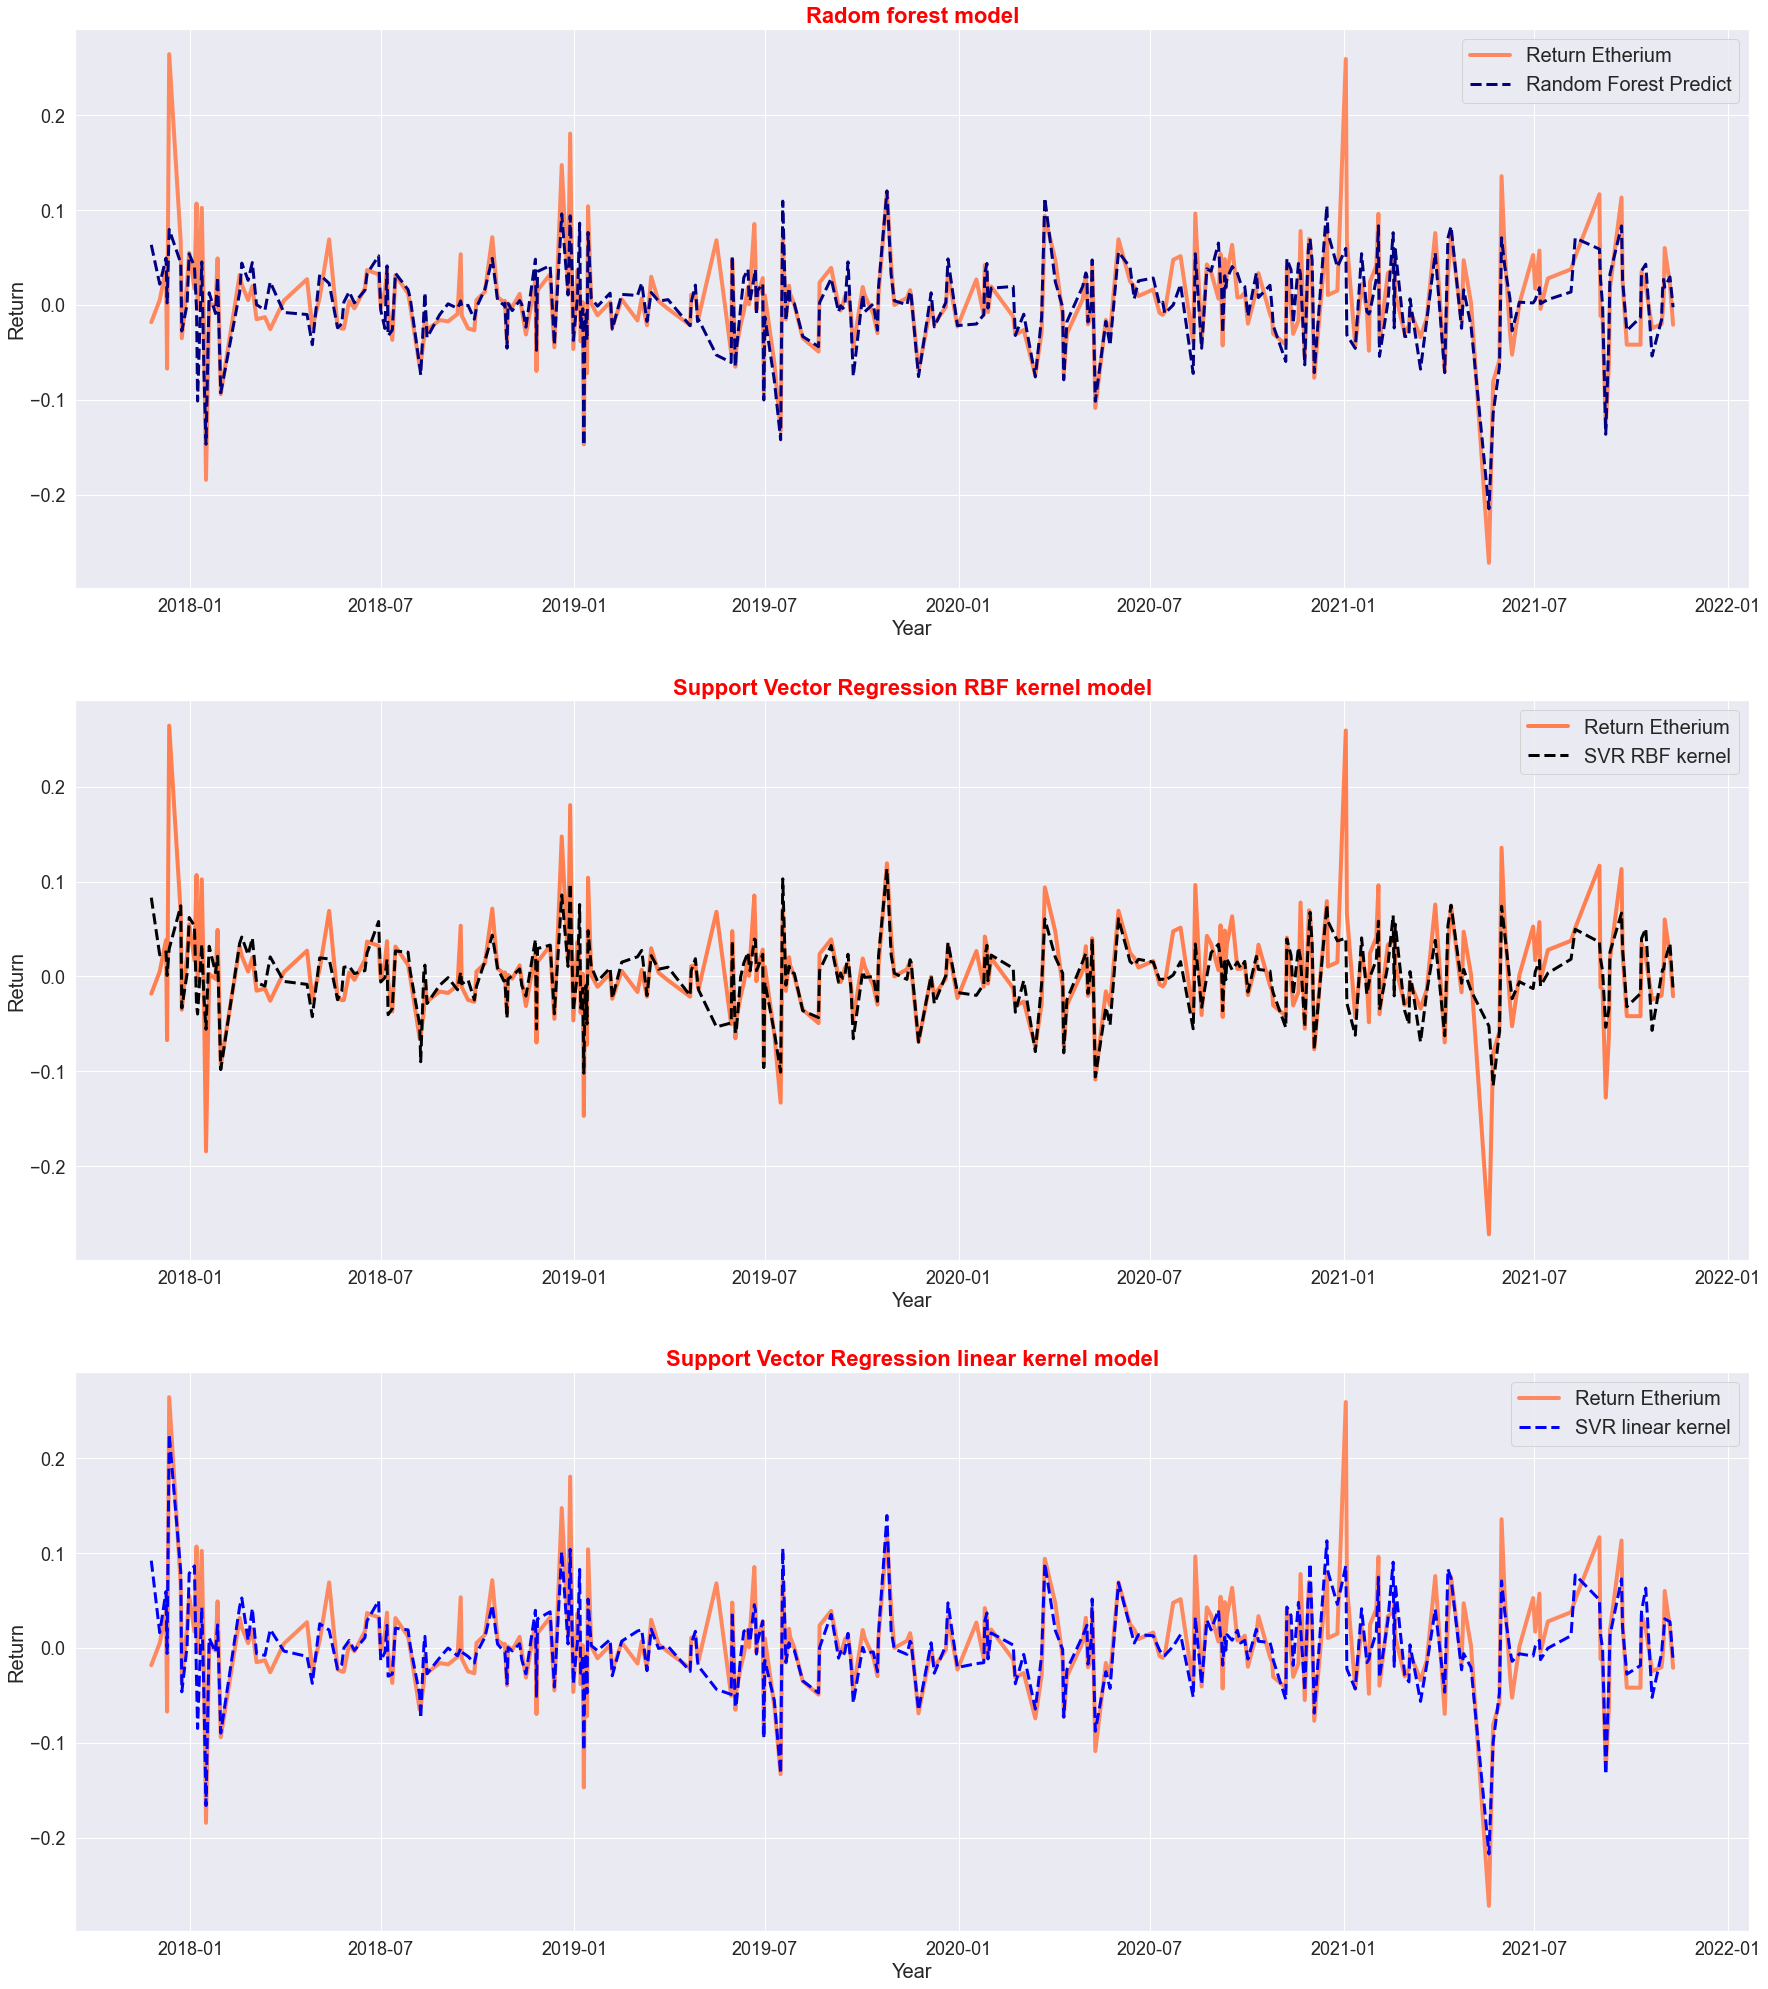

In [18]:
# Plot model
plt.figure(figsize=(30,35))

######################################################### plot 1. Random forest ########################################################
plt.subplot(3, 1, 1)

plt.plot(model_results.return_etherium,c='coral',linewidth = 4,alpha= 0.9)
plt.plot(model_results.random_forest_predict,'--',color = 'navy',linewidth = 3)

plt.legend(['Return Etherium','Random Forest Predict'],fontsize=20.0)
plt.xlabel('Year',fontsize = 20.0)
plt.ylabel('Return',fontsize = 20.0)
plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)

plt.title('Radom forest model',size=22.0,fontweight="bold", color = 'red')

######################################################## plot 2. SVR RBF kernel #########################################################
plt.subplot(3, 1, 2)

plt.plot(model_results.return_etherium,c='coral',linewidth = 4)
plt.plot(model_results.svr_rbf_predict,'--',color = 'black',linewidth = 3)

plt.legend(['Return Etherium','SVR RBF kernel'],fontsize=20.0)
plt.xlabel('Year',fontsize = 20.0)
plt.ylabel('Return',fontsize = 20.0)
plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)

plt.title('Support Vector Regression RBF kernel model',size=22.0,fontweight="bold", color = 'red')

####################################################### plot 3. SVR linear kernel  #######################################################
plt.subplot(3, 1, 3)
plt.plot(model_results.return_etherium,c='coral',linewidth = 4,alpha= 0.9)
plt.plot(model_results.svr_linear_predict,'--',color = 'blue',linewidth =3)

plt.legend(['Return Etherium','SVR linear kernel'],fontsize=20.0)
plt.xlabel('Year',fontsize = 20.0)
plt.ylabel('Return',fontsize = 20.0)
plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)

plt.title('Support Vector Regression linear kernel model',size=22.0,fontweight="bold", color = 'red')

plt.show()

**RMSE & MAPE**

In [19]:
# Random Forest Regression model
rmse = np.sqrt(mean_squared_error(model_results.return_etherium, model_results.random_forest_predict))
mae = mean_absolute_error(model_results.return_etherium, model_results.random_forest_predict)
mape = mean_absolute_percentage_error(model_results.return_etherium, model_results.random_forest_predict)

print('Random Forest Regression model:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAE = {round(mae,4)}')
print(f'MAPE = {round(mape,2)}%')

Random Forest Regression model:
RMSE = 0.031
MAE = 0.0196
MAPE = 2.28%


In [20]:
# RBF kernel
rmse = np.sqrt(mean_squared_error(model_results.return_etherium, model_results.svr_rbf_predict))
mae = mean_absolute_error(model_results.return_etherium, model_results.svr_rbf_predict)
mape = (mean_absolute_percentage_error(model_results.return_etherium, model_results.svr_rbf_predict))

print('Support Vector Regression with RBF kernel:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAE = {round(mae,4)}')
print(f'MAPE = {round(mape,2)}%')

Support Vector Regression with RBF kernel:
RMSE = 0.0362
MAE = 0.0207
MAPE = 1.88%


In [21]:
# Linear kernel
rmse = np.sqrt(mean_squared_error(model_results.return_etherium, model_results.svr_linear_predict))
mae = mean_absolute_error(model_results.return_etherium, model_results.svr_linear_predict)
mape = (mean_absolute_percentage_error(model_results.return_etherium, model_results.svr_linear_predict))

print('Support Vector Regression with linear kernel:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAE = {round(mae,4)}')
print(f'MAPE = {round(mape,2)}%')

Support Vector Regression with linear kernel:
RMSE = 0.0294
MAE = 0.0191
MAPE = 1.4%


# **PREDICT ON THE NEW DATASET**

**Import new dataset**

In [50]:
# Call new dataset
df_new = data.loc['2021-11-11':'2022-05-29']
df_new.index = df_new.index.set_names('Test sheet')
df_new


,polarity,subjectivity,Negative,Positive,return_etherium,return_bitcoin,return_litecoin,avg_diff,act_address,avg_gas,trans_count,block_count,block_size
Test sheet,,,,,,,,,,,,,
2021-11-11,0.084444,0.238889,0.0,1.0,0.020321,-0.000697,0.006980,1.100000e+16,648382.0,56.816258,1347643.0,6373.0,407898241.0
2021-11-12,0.000000,0.000000,0.0,0.0,-0.013375,-0.012225,-0.043820,1.090000e+16,643078.0,52.222638,1345131.0,6421.0,397037354.0
2021-11-13,0.275793,0.568773,0.0,1.0,-0.003354,0.004888,0.025977,1.120000e+16,645915.0,47.066118,1300464.0,6326.0,408939073.0
2021-11-14,0.127778,0.427778,0.0,1.0,-0.005396,0.015470,0.077159,1.100000e+16,643454.0,41.162157,1275744.0,6345.0,411628527.0
2021-11-15,0.500000,0.500000,0.0,1.0,-0.014883,-0.029159,-0.054833,1.120000e+16,606036.0,54.624386,1289636.0,6319.0,431699193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,0.200000,0.162500,0.0,1.0,-0.017259,-0.003144,-0.028561,1.440000e+16,508395.0,6.325360,1094639.0,6165.0,633978416.0
2022-05-26,0.163997,0.277742,0.0,1.0,-0.072456,-0.009984,-0.065653,1.420000e+16,474790.0,8.062978,1071180.0,6092.0,687245210.0
2022-05-27,-0.051562,0.317188,1.0,0.0,-0.043788,-0.021856,-0.035474,1.460000e+16,494940.0,6.816255,1093469.0,6218.0,618243706.0


In [51]:
# Set the independent variable property
feature_new = df_new.columns[df_new.columns!='return_etherium'].to_list()
target_new =  [df_new.columns[4]]

y_new = df_new[target_new]
X_new = df_new[feature_new]

**Randome Forest**


In [52]:
# Predict
y_new_pred = random_forest.predict(X_new)
y_new_pred = pd.DataFrame(y_new_pred,index=y_new.index,columns=['random_forest_predict'])

# Create dataframe contain real and forecast value
result_RF_new = pd.concat([y_new,y_new_pred],axis=1)
result_RF_new.sort_index(inplace=True)
result_RF_new.head(7)

,return_etherium,random_forest_predict
Test sheet,,
2021-11-11,0.020321,0.022113
2021-11-12,-0.013375,-0.025411
2021-11-13,-0.003354,0.033198
2021-11-14,-0.005396,0.040068
2021-11-15,-0.014883,-0.050458
2021-11-16,-0.074852,-0.111206
2021-11-17,0.016893,0.016830


**Support Vector Regression**

In [53]:
# Scale x
X_new_sc = sc_X.fit_transform(X_new)

################################## SVR RBF kernel predict ##################################
y_new_rbf_pred = regressor_rbf.predict(X_new_sc)
y_new_rbf_pred = y_new_rbf_pred.reshape(-1,1)

# Inverse data
y_new_rbf_pred = sc_y.inverse_transform(y_new_rbf_pred)
y_new_rbf_pred = pd.DataFrame(y_new_rbf_pred,columns=['svr_rbf_predict'],index=y_new.index)

################################## SVR linear kernel predict ##################################
y_new_linear_pred = regressor_linear.predict(X_new_sc)
y_new_linear_pred = y_new_linear_pred.reshape(-1,1)

# Inverse data
y_new_linear_pred = sc_y.inverse_transform(y_new_linear_pred)
y_new_linear_pred = pd.DataFrame(y_new_linear_pred,columns=['svr_linear_predict'],index=y_new.index)

In [54]:
result_svr_new = pd.concat([y_new,y_new_rbf_pred,y_new_linear_pred],axis=1)
result_svr_new.head(7)

,return_etherium,svr_rbf_predict,svr_linear_predict
Test sheet,,,
2021-11-11,0.020321,0.005075,0.022429
2021-11-12,-0.013375,0.001078,-0.010820
2021-11-13,-0.003354,0.005262,0.039454
2021-11-14,-0.005396,0.028873,0.074877
2021-11-15,-0.014883,-0.014335,-0.029148
2021-11-16,-0.074852,-0.021483,-0.092890
2021-11-17,0.016893,0.017099,0.025526


# **ASSESSMENT OF THE MODEL ON NEW DATA SET**

In [55]:
new_model_result = pd.concat([result_svr_new,result_RF_new.random_forest_predict],axis=1)
new_model_result.head(7)

,return_etherium,svr_rbf_predict,svr_linear_predict,random_forest_predict
Test sheet,,,,
2021-11-11,0.020321,0.005075,0.022429,0.022113
2021-11-12,-0.013375,0.001078,-0.010820,-0.025411
2021-11-13,-0.003354,0.005262,0.039454,0.033198
2021-11-14,-0.005396,0.028873,0.074877,0.040068
2021-11-15,-0.014883,-0.014335,-0.029148,-0.050458
2021-11-16,-0.074852,-0.021483,-0.092890,-0.111206
2021-11-17,0.016893,0.017099,0.025526,0.016830


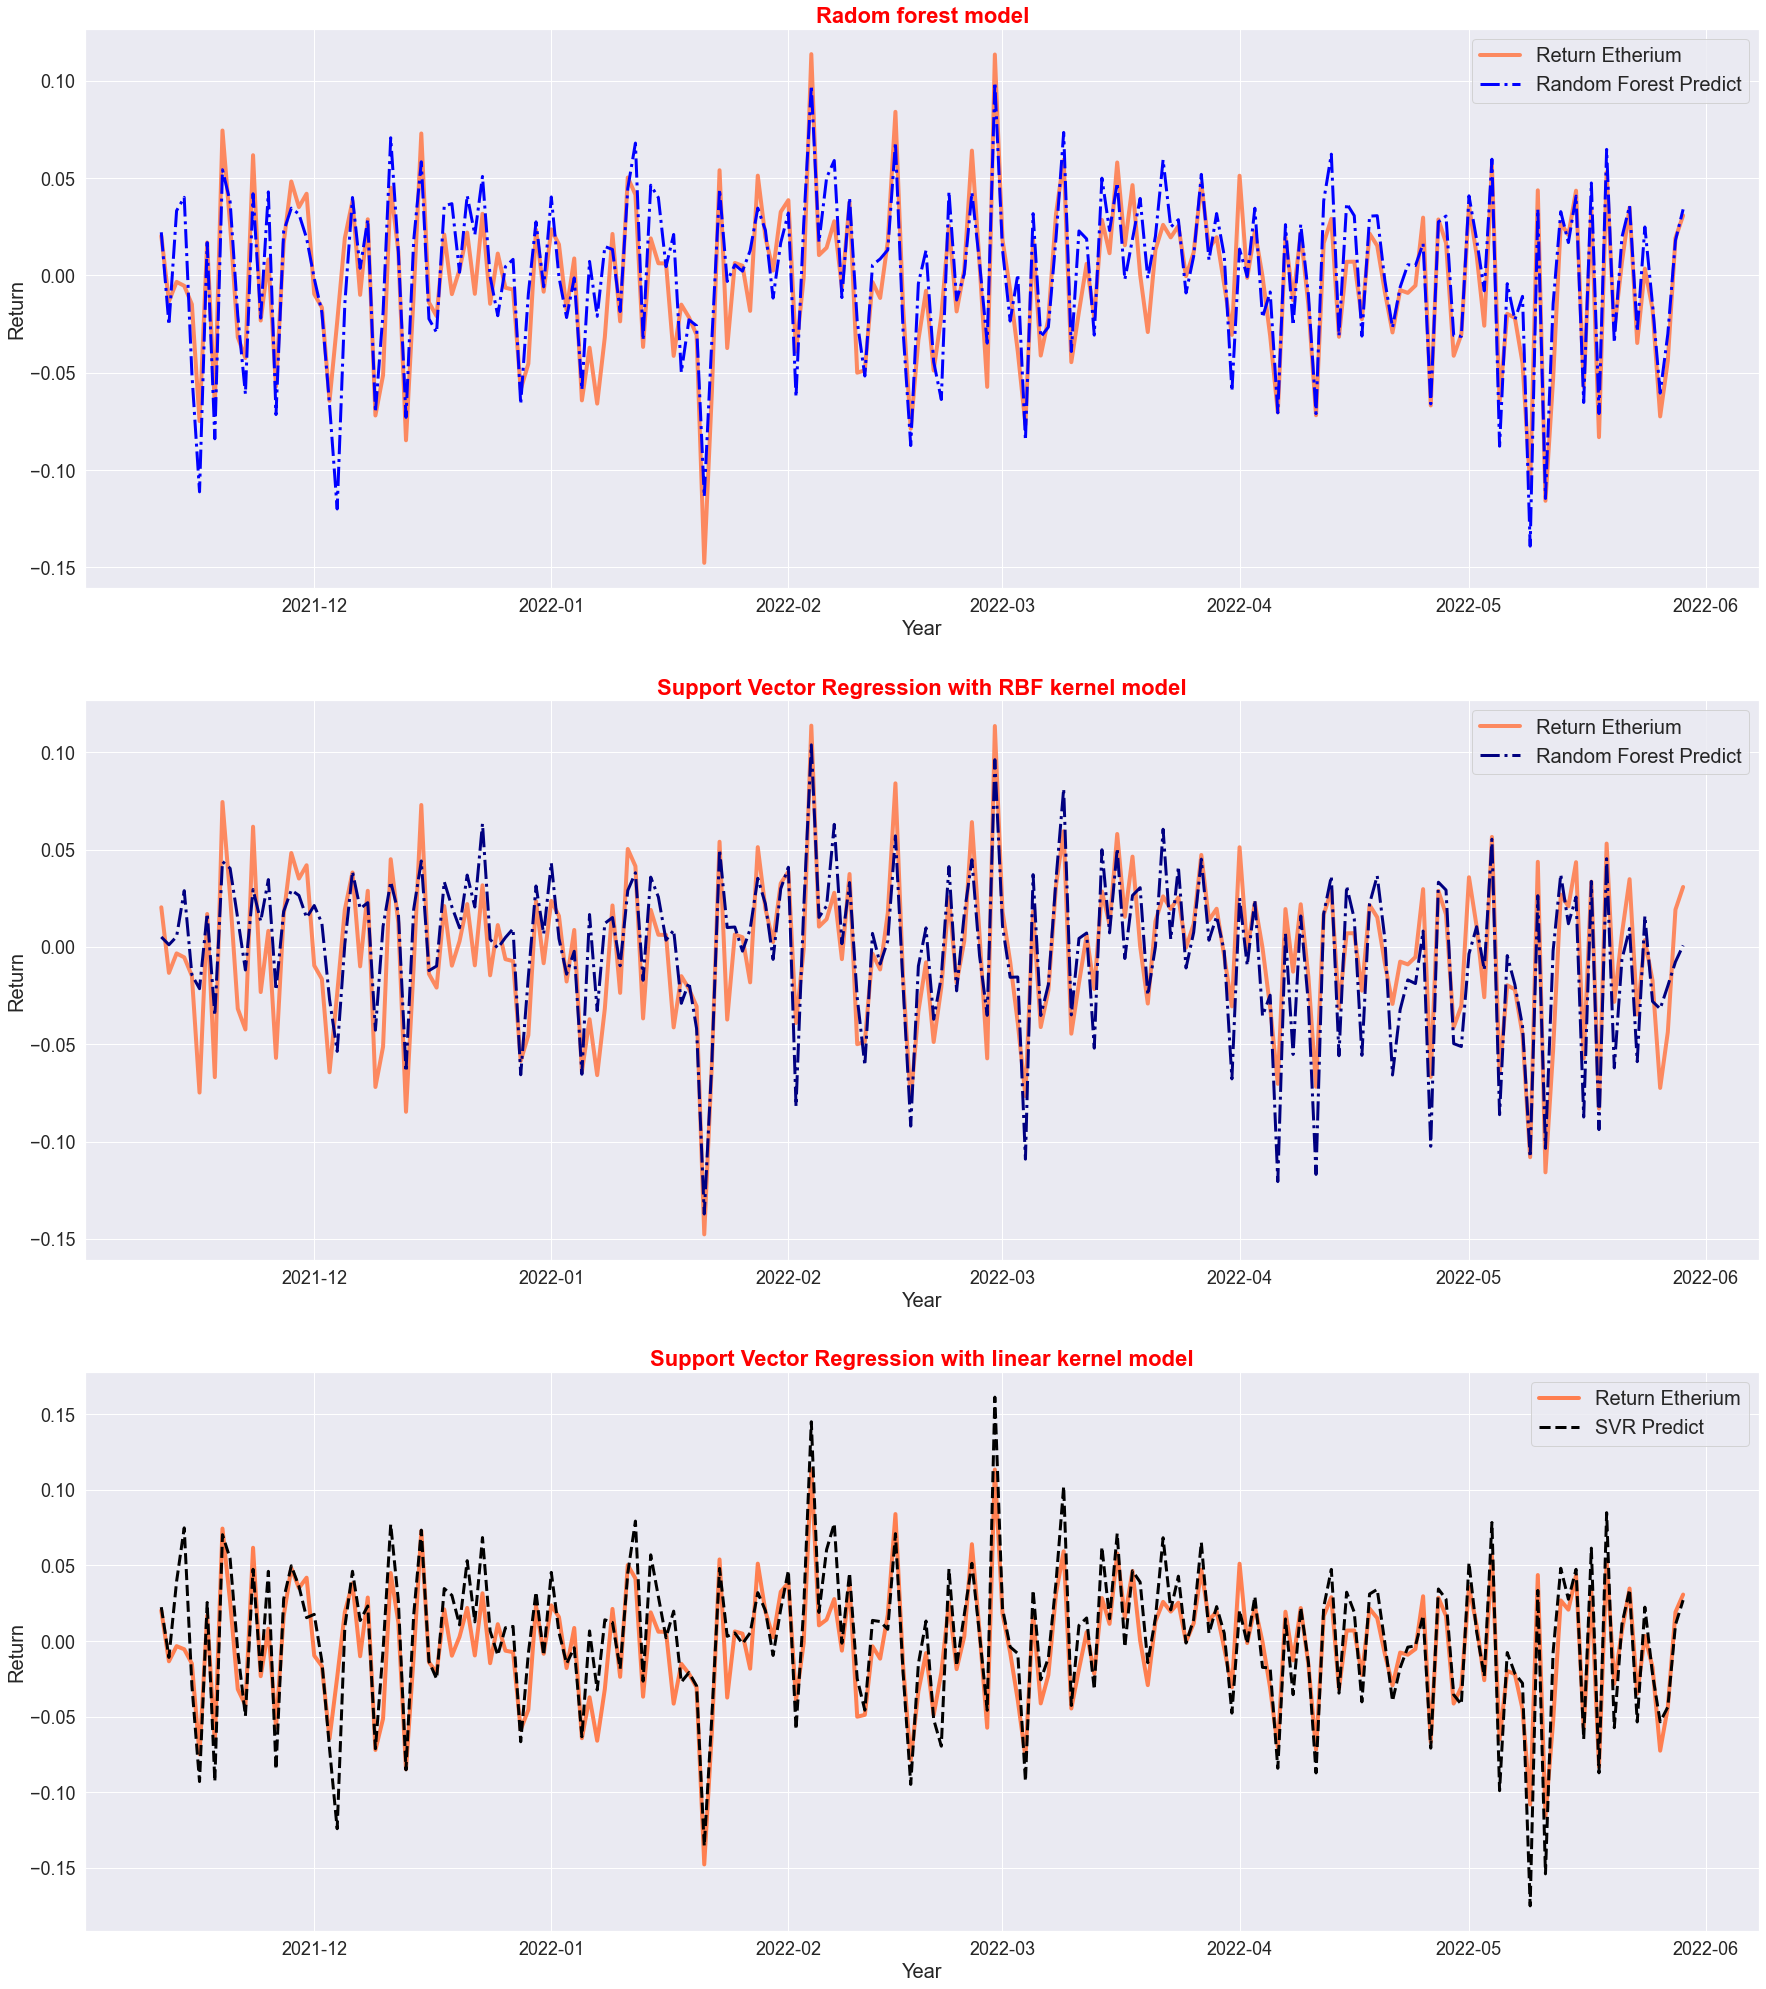

In [56]:
# plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(30,35))
######################################################### plot 1. Random forest ########################################################
plt.subplot(3, 1, 1)

plt.plot(new_model_result.return_etherium,c='coral',linewidth = 4,alpha= 0.9)
plt.plot(new_model_result.random_forest_predict,'-.',color = 'blue',linewidth = 3)

plt.legend(['Return Etherium','Random Forest Predict'],fontsize = 20.0)
plt.xlabel('Year',fontsize = 20.0)
plt.ylabel('Return',fontsize = 20.0)
plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)

plt.title('Radom forest model',size = 22,fontweight="bold", color = 'red')

######################################################## plot 2. SVR RBF kernel #########################################################
plt.subplot(3, 1, 2)

plt.plot(new_model_result.return_etherium,c='coral',linewidth = 4,alpha= 0.9)
plt.plot(new_model_result.svr_rbf_predict,'-.',color = 'navy',linewidth = 3)

plt.legend(['Return Etherium','Random Forest Predict'],fontsize = 20.0)
plt.xlabel('Year',fontsize = 20.0)
plt.ylabel('Return',fontsize = 20.0)
plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)

plt.title('Support Vector Regression with RBF kernel model',size = 22,fontweight="bold", color = 'red')

####################################################### plot 3. SVR linear kernel  #######################################################
plt.subplot(3, 1, 3)
plt.plot(new_model_result.return_etherium,c='coral',linewidth = 4)
plt.plot(new_model_result.svr_linear_predict,'--',color = 'black',linewidth = 3)

plt.legend(['Return Etherium','SVR Predict'],fontsize = 20.0)
plt.xlabel('Year',fontsize = 20.0)
plt.ylabel('Return',fontsize = 20.0)
plt.xticks(fontsize = 18.0)
plt.yticks(fontsize = 18.0)

plt.title('Support Vector Regression with linear kernel model',size = 22,fontweight="bold", color = 'red')


plt.show()

**RMSE & MAPE**

In [57]:
rmse = np.sqrt(mean_squared_error(new_model_result.return_etherium, new_model_result.random_forest_predict))
mae = mean_absolute_error(new_model_result.return_etherium, new_model_result.random_forest_predict)
mape = mean_absolute_percentage_error(new_model_result.return_etherium, new_model_result.random_forest_predict)

print('Random Forest:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAE = {round(mae,4)}')
print(f'MAPE = {round(mape,2)}%')

Random Forest:
RMSE = 0.0206
MAE = 0.0154
MAPE = 1.94%


In [58]:
rmse = np.sqrt(mean_squared_error(new_model_result.return_etherium, new_model_result.svr_rbf_predict))
mae = mean_absolute_error(new_model_result.return_etherium, new_model_result.svr_rbf_predict)
mape = (mean_absolute_percentage_error(new_model_result.return_etherium, new_model_result.svr_rbf_predict))

print('Support Vector Regression with RBF kernel:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAE = {round(mae,4)}')
print(f'MAPE = {round(mape,2)}%')

Support Vector Regression with RBF kernel:
RMSE = 0.0219
MAE = 0.0175
MAPE = 1.95%


In [59]:
rmse = np.sqrt(mean_squared_error(new_model_result.return_etherium, new_model_result.svr_linear_predict))
mae = mean_absolute_error(new_model_result.return_etherium, new_model_result.svr_linear_predict)
mape = (mean_absolute_percentage_error(new_model_result.return_etherium, new_model_result.svr_linear_predict))

print('Support Vector Regression with linear kernel:')
print(f'RMSE = {round(rmse,4)}')
print(f'MAE = {round(mae,4)}')
print(f'MAPE = {round(mape,2)}%')

Support Vector Regression with linear kernel:
RMSE = 0.0224
MAE = 0.0163
MAPE = 1.83%
